<a href="https://colab.research.google.com/github/YoussefDiaa1/Project-ITI/blob/main/English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

file_path = '/content/drive/MyDrive/D/IMDB Dataset.csv'
df = pd.read_csv(file_path)


print("CSV file loaded successfully! Here are the first few rows:")
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CSV file loaded successfully! Here are the first few rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df1 = df.copy()

In [7]:
df.duplicated().sum()

np.int64(418)

<Axes: xlabel='sentiment'>

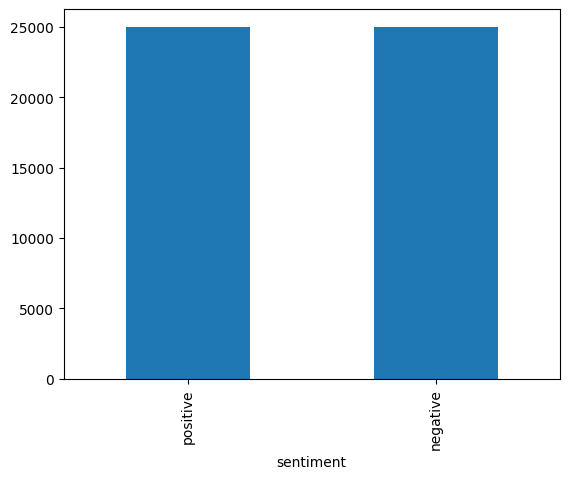

In [8]:
df1['sentiment'].value_counts().plot(kind='bar')

# Data Preprocessing

1 - Removing the html tags



In [9]:
def cleaner_text(text):
  #removing the html tags
  text=re.sub(r"<.*?>"," ",text)
  return text

In [10]:
df.review = df.review.apply(cleaner_text)

In [11]:
df.review[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.  At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.  Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.  I imagine this film would appeal to a stoner who is currently partaking.  For something similar but better try "Brother from another planet"'

2 - Removing the punctuations associated with the text


In [12]:
def remove_marks(text):
  text = re.sub(r'[^\w\s]','',text)
  return text

In [13]:
df.review = df.review.apply(remove_marks)

In [14]:
df.review[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines  At first it was very odd and pretty funny but as the movie progressed I didnt find the jokes or oddness funny anymore  Its a low budget film thats never a problem in itself there were some pretty interesting characters but eventually I just lost interest  I imagine this film would appeal to a stoner who is currently partaking  For something similar but better try Brother from another planet'

3 - Removing apstrohs and backquotes


In [15]:
def remove_apstrohs(text):
  text = re.sub(r"[\'`]","",text)
  return text

In [16]:
df.review = df.review.apply(remove_apstrohs)

In [17]:
df.review[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines  At first it was very odd and pretty funny but as the movie progressed I didnt find the jokes or oddness funny anymore  Its a low budget film thats never a problem in itself there were some pretty interesting characters but eventually I just lost interest  I imagine this film would appeal to a stoner who is currently partaking  For something similar but better try Brother from another planet'

4 - Removing the stopwords


In [18]:
stop_words = stopwords.words('english')

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def remove_stops(text):
    n_text = []
    text = text.lower()
    tokens = word_tokenize(text)
    for word in tokens:
        if word not in stop_words:
            n_text.append(word)
    return " ".join(n_text)

In [21]:
df.review = df.review.apply(remove_stops)

In [22]:
df.review[10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines first odd pretty funny movie progressed didnt find jokes oddness funny anymore low budget film thats never problem pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking something similar better try brother another planet'

In [23]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [25]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.6 MB/s eta 0:00:00


5  - Performing Lemmatization using Spacy


In [26]:
import re
import nltk
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng") # Added to fix the error
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

# Function to get proper POS tags for better lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Final preprocessing function
def complete_preprocessing(text):
    """
    Complete the preprocessing steps:
    1. Expand contractions
    2. Handle numbers
    3. Remove extra whitespace
    4. Lemmatization (using NLTK)
    """

    # Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and lemmatize using NLTK
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    text = " ".join(lemmatized)

    return text

# Apply to the review column
df['review'] = df['review'].apply(complete_preprocessing)

# Check results
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review,sentiment
0,one reviewer mention watch oz episode you will...,positive
1,wonderful little production film technique una...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there be family little boy jake thin...,negative
4,petter matteis love time money visually stun f...,positive


In [ ]:
# Save the fully preprocessed data
preprocessed_df = df[['review', 'sentiment']]
preprocessed_df.to_csv('/content/drive/MyDrive/D/IMDB_Dataset_Fully_Preprocessed.csv', index=False)

print("Fully preprocessed data saved successfully!")

Fully preprocessed data saved successfully!


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

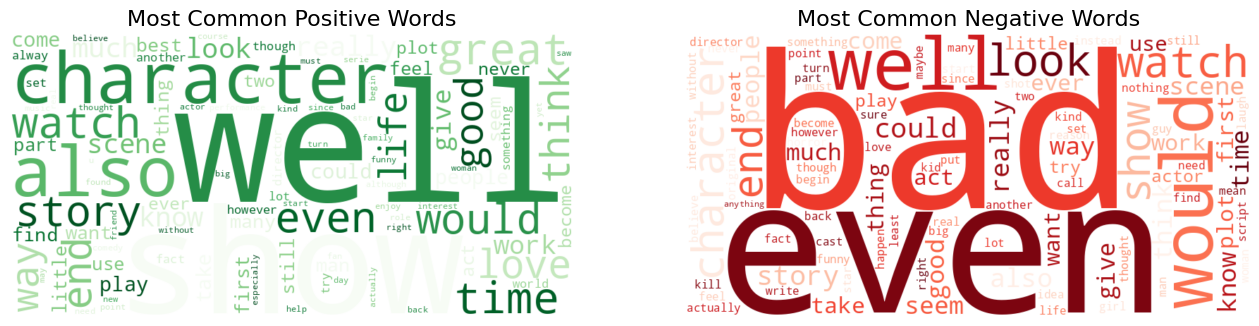

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Use NLTK stopwords + custom stopwords for lemmatized forms
stop_words = set(stopwords.words('english'))
custom_stopwords = {"film", "movie", "one", "like", "get", "go", "see", "make", "say", "be"}
stop_words = stop_words.union(custom_stopwords)

# Generate text for positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['review'])

# Generate positive WordCloud
positive_wc = WordCloud(width=800, height=400,
                        background_color='white',
                        colormap='Greens',
                        stopwords=stop_words,
                        max_words=100).generate(positive_reviews)

# Generate negative WordCloud
negative_wc = WordCloud(width=800, height=400,
                        background_color='white',
                        colormap='Reds',
                        stopwords=stop_words,
                        max_words=100).generate(negative_reviews)

# Plot side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Positive Words", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Negative Words", fontsize=16)

plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("/content/IMDB_Dataset_Fully_Preprocessed.csv", engine="python", on_bad_lines="skip")
df

,review,sentiment
0,one reviewer mention watch oz episode you will...,positive
1,wonderful little production film technique una...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there be family little boy jake thin...,negative
4,petter matteis love time money visually stun f...,positive
...,...,...
49995,thought movie right good job be not creative o...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,i be go disagree previous comment side maltin ...,negative


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["review"])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4014771 stored elements and shape (50000, 5000)>

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(X.shape)

(50000, 5000)


In [ ]:
df['sentiment'] = (
    df['sentiment']
    .str.replace(" ", "", regex=True)
    .str.lower()
    .map({"positive": 1, "negative": 0})
)

print(df)

                                                  review  sentiment
0      one reviewer mention watch oz episode you will...          1
1      wonderful little production film technique una...          1
2      thought wonderful way spend time hot summer we...          1
3      basically there be family little boy jake thin...          0
4      petter matteis love time money visually stun f...          1
...                                                  ...        ...
49995  thought movie right good job be not creative o...          1
49996  bad plot bad dialogue bad act idiotic direct a...          0
49997  catholic taught parochial elementary school nu...          0
49998  i be go disagree previous comment side maltin ...          0
49999  one expect star trek movie high art fan expect...          0

[50000 rows x 2 columns]


In [ ]:
y=df['sentiment']
y

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
y_test.values

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[4192  769]
 [ 732 4307]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Accuracy: 0.8844

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



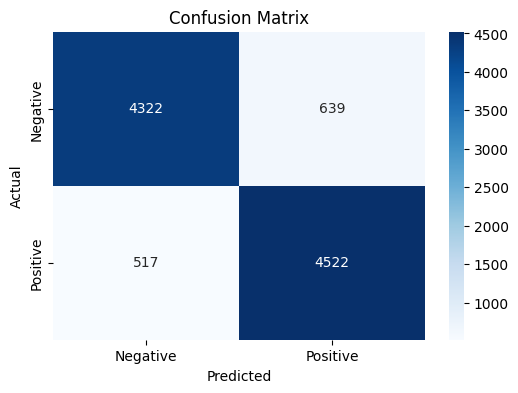

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Naive Bayes Accuracy: 0.8499

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



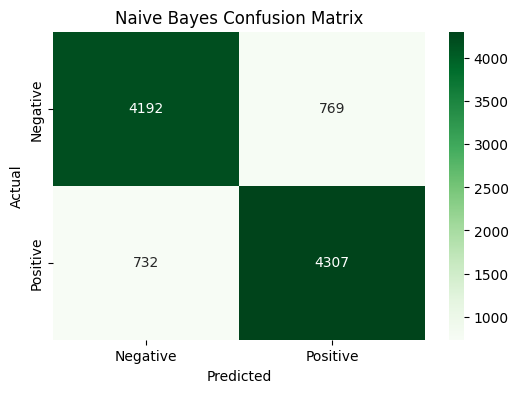

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.8508

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



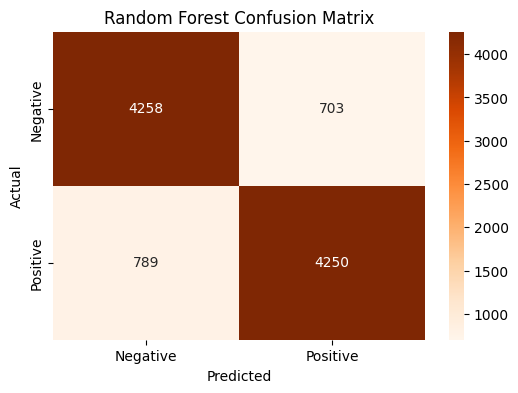

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()
